# Different Strategies for Modeling Stock Prices

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gbm_motion(steps, initial_value, volatility, short_rate, dt=1.0):
    paths = [initial_value]
    for _ in range(steps-1):
        paths.append(paths[-1]*np.exp((short_rate-0.5*volatility**2)*dt + volatility*np.sqrt(dt)*np.random.standard_normal()))
    return paths

In [3]:
def jump_diffusion(
        mu,
        sigma,
        start,
        steps,
        t_step=1.0,
        riskless_sr=0.05,
        delta=0.25,
        poisson_intensity=0.75):
    """Merton Jump Diffusion implementation"""
    jump_correction = poisson_intensity * (np.exp(mu + 0.5 * delta**2) - 1)
    prices = [start]
    for _ in range(steps - 1):
        prices.append(max(
            0.0,
            prices[-1] * (np.exp(
                t_step * (riskless_sr - jump_correction - 0.5 * sigma**2) +
                sigma * np.sqrt(t_step) * np.random.standard_normal()) +
                (np.exp(mu + delta * np.random.standard_normal()) - 1) *
                np.random.poisson(poisson_intensity * t_step))))
        
    return prices

In [4]:
def sqrt_diffusion(mu, sigma, start, steps, mean_reversion=2.0, t_step=1.0):
    """Sqrt diffusion implementation"""
    prev = start
    prices = [start]
    for _ in range(steps - 1):
        prev = (prev + mean_reversion * (mu - prices[-1]) * t_step +
                sigma * np.sqrt(prices[-1] * t_step) * np.random.standard_normal())
        prices.append(max(0.0, prev))
    return prices

In [5]:
iv = 36
steps = 100
num_traces = 100
p_mu = 40.
vol = 0.02
sr = 0.005
mu = -0.1
delta = 0.001
lamb = 0.01
mv = 0.0001

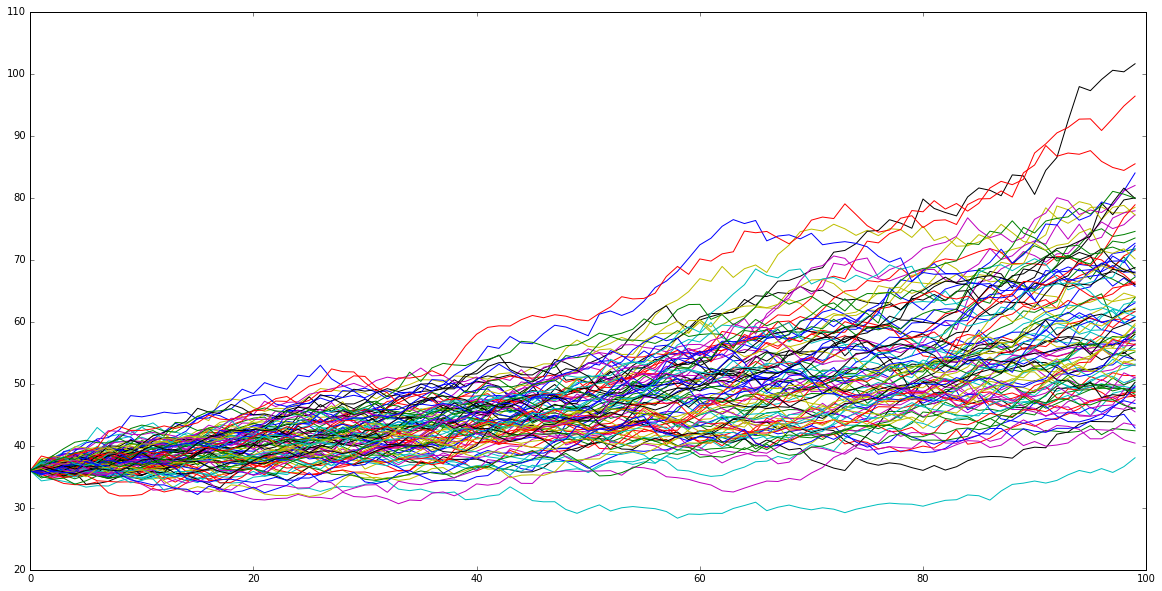

In [6]:
# Geometric Brownian Motion
plt.figure(figsize=(20, 10))
for _ in range(num_traces):
    plt.plot([i for i in range(steps)], gbm_motion(steps, iv, vol, sr))
plt.show()

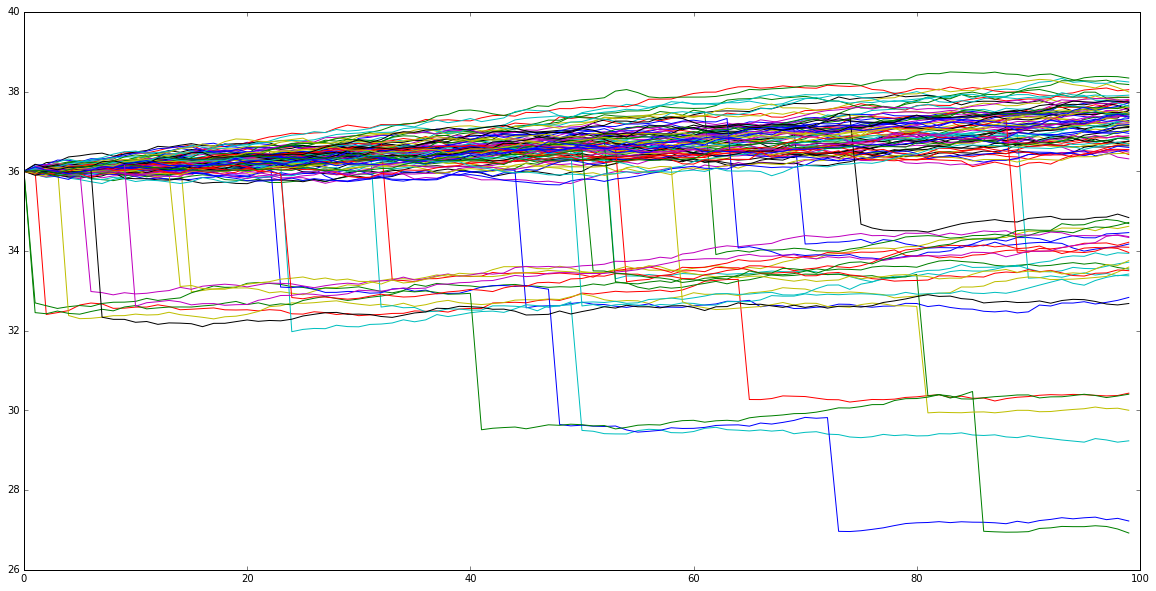

In [7]:
# Jump diffusion
plt.figure(figsize=(20, 10))
for _ in range(num_traces):
    plt.plot([i for i in range(steps)], jump_diffusion(mu, vol, iv, steps, sr, delta, lamb))
plt.show()

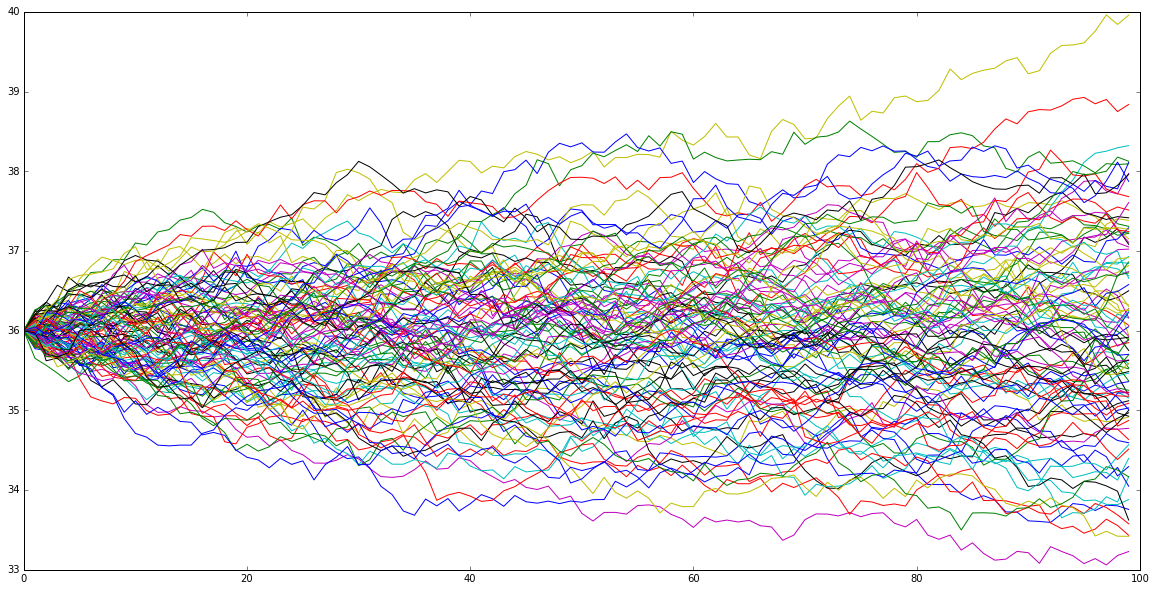

In [8]:
# Square-root diffusion
plt.figure(figsize=(20,10))
for _ in range(num_traces):
    plt.plot([i for i in range(steps)], sqrt_diffusion(p_mu, vol, iv, steps, mv))
plt.show()